In [4]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


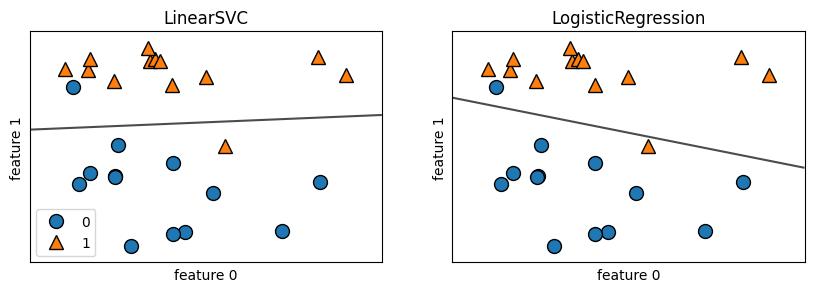

In [5]:
X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(max_iter=5000), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend()

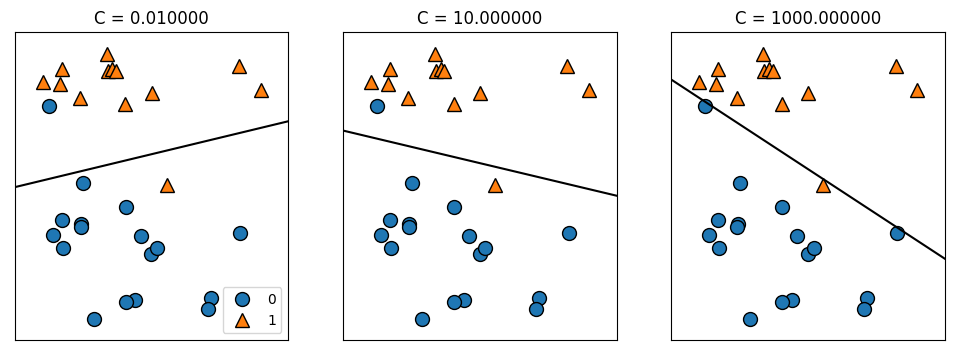

In [6]:
mglearn.plots.plot_linear_svc_regularization()

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test, y_test)))

training set score: 0.958
test set score: 0.958


In [8]:
logreg100 = LogisticRegression(C=100, max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

training set score: 0.984
test set score: 0.965


In [9]:
logreg001 = LogisticRegression(C=0.01, max_iter=5000).fit(X_train, y_train)
print("training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

training set score: 0.953
test set score: 0.951


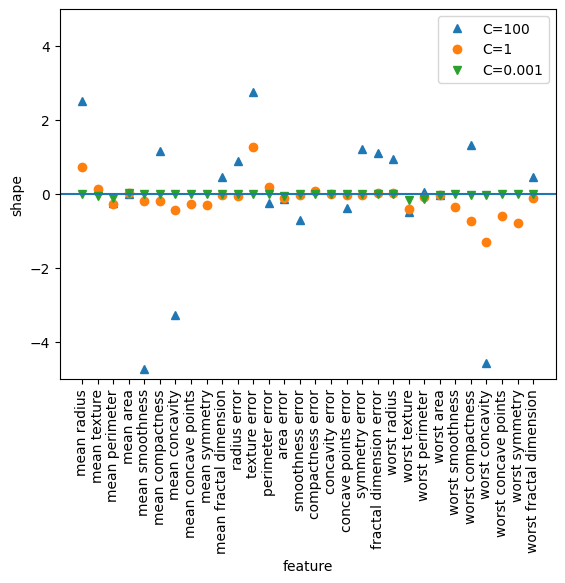

In [10]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("feature")
plt.ylabel("shape")
plt.legend()

C=0.001 l1 LogisticRegression training score: 0.91
C=0.001 l1 LogisticRegression test score: 0.92
C=1.000 l1 LogisticRegression training score: 0.96
C=1.000 l1 LogisticRegression test score: 0.96
C=100.000 l1 LogisticRegression training score: 0.99
C=100.000 l1 LogisticRegression test score: 0.98


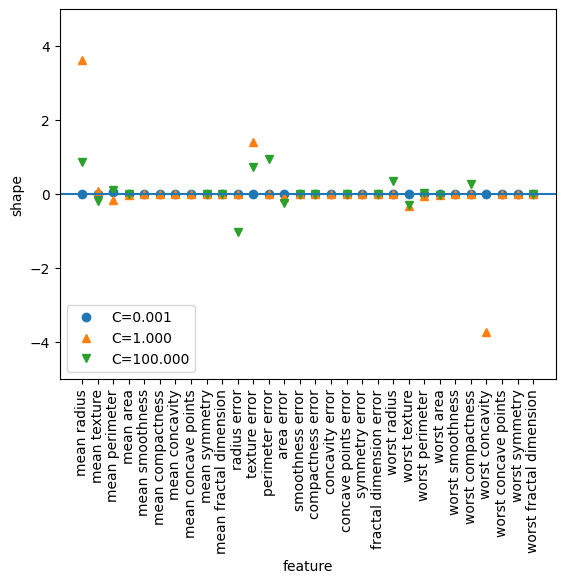

In [11]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(solver='liblinear', C=C, penalty="l1", max_iter=1000).fit(X_train, y_train)
    print("C={:.3f} l1 LogisticRegression training score: {:.2f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} l1 LogisticRegression test score: {:.2f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("feature")
plt.ylabel("shape")

plt.ylim(-5, 5)
plt.legend(loc=3)

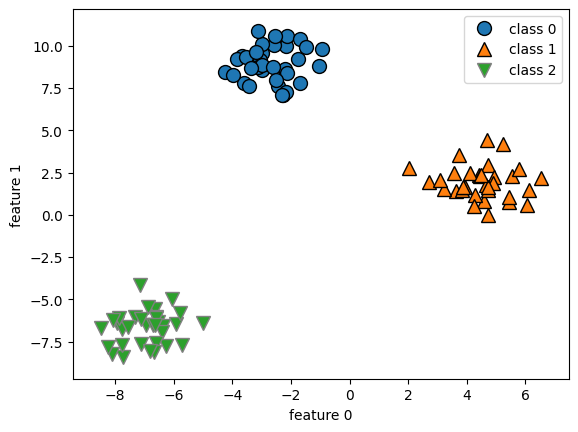

In [12]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.legend(["class 0", "class 1", "class 2"])

In [13]:
linear_svm = LinearSVC().fit(X, y)
print("coefficient array shape: ", linear_svm.coef_.shape)
print("joelpyeon array shape: ", linear_svm.intercept_.shape)

coefficient array shape:  (3, 2)
joelpyeon array shape:  (3,)


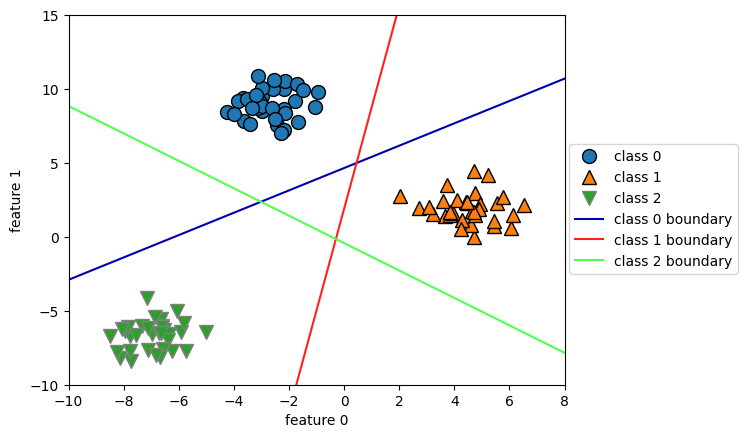

In [14]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], 
          loc=(1.01, 0.3))

Text(0, 0.5, 'feature 1')

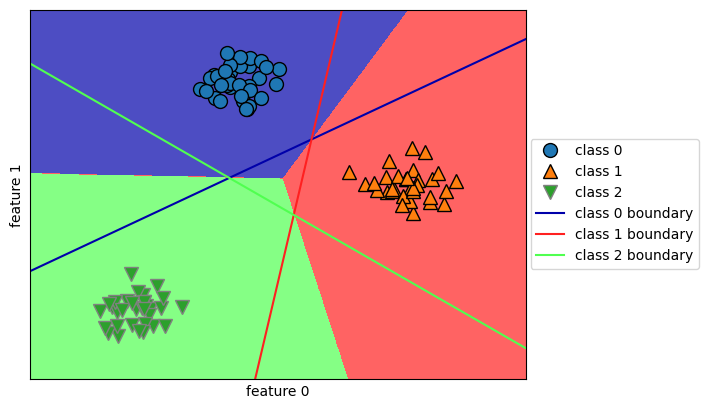

In [15]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], 
          loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")

In [16]:
logreg = LogisticRegression().fit(X_train, y_train)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/home/ai/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


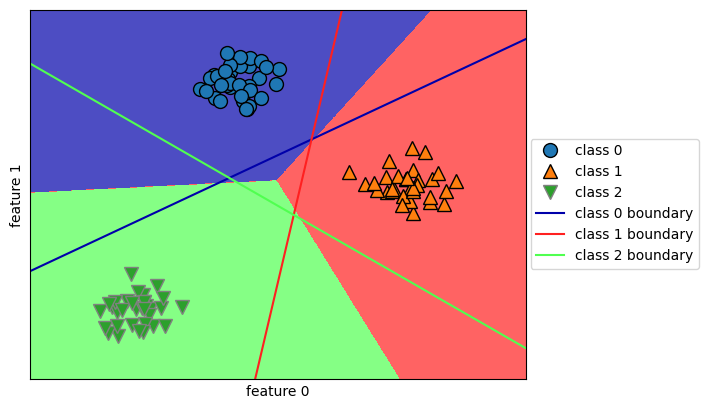

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_c = SGDClassifier(alpha=0.01, learning_rate='adaptive',
                      eta0=0.1, random_state=42, n_jobs=-1)

sgd_c.fit(X, y)

mglearn.plots.plot_2d_classification(sgd_c, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['class 0', 'class 1', 'class 2', 'class 0 boundary', 'class 1 boundary', 'class 2 boundary'], 
          loc=(1.01, 0.3))
plt.xlabel("feature 0")
plt.ylabel("feature 1")
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

sgd_r = SGDRegressor(learning_rate='adaptive', eta0=0.1, random_state=42)
sgd_r.fit(X_train, y_train)

print("training set score: {:.3f}".format(sgd_r.score(X_train, y_train)))
print("test set score: {:.3f}".format(sgd_r.score(X_test, y_test)))

training set score: 0.907
test set score: 0.770


/home/ai/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset

In [21]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [22]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)

print("feature count:\n", counts)

feature count:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [23]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("test set score: {:.3f}".format(tree.score(X_test, y_test)))

training set score: 1.000
test set score: 0.937


In [24]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("training set score: {:.3f}".format(tree.score(X_train, y_train)))
print("test set score: {:.3f}".format(tree.score(X_test, y_test)))

training set score: 0.988
test set score: 0.951


In [25]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malicious", "positive"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

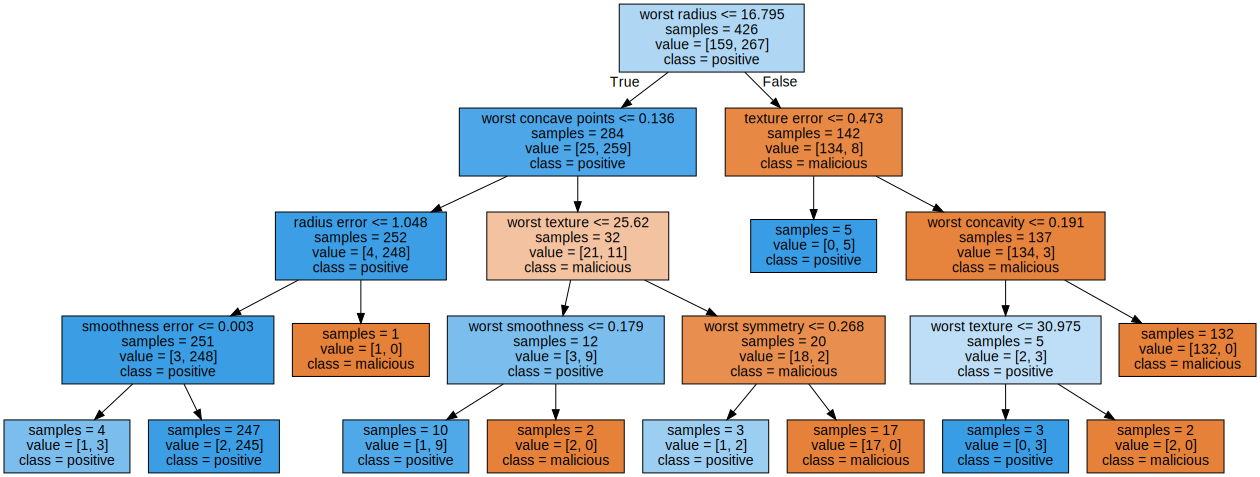

In [26]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

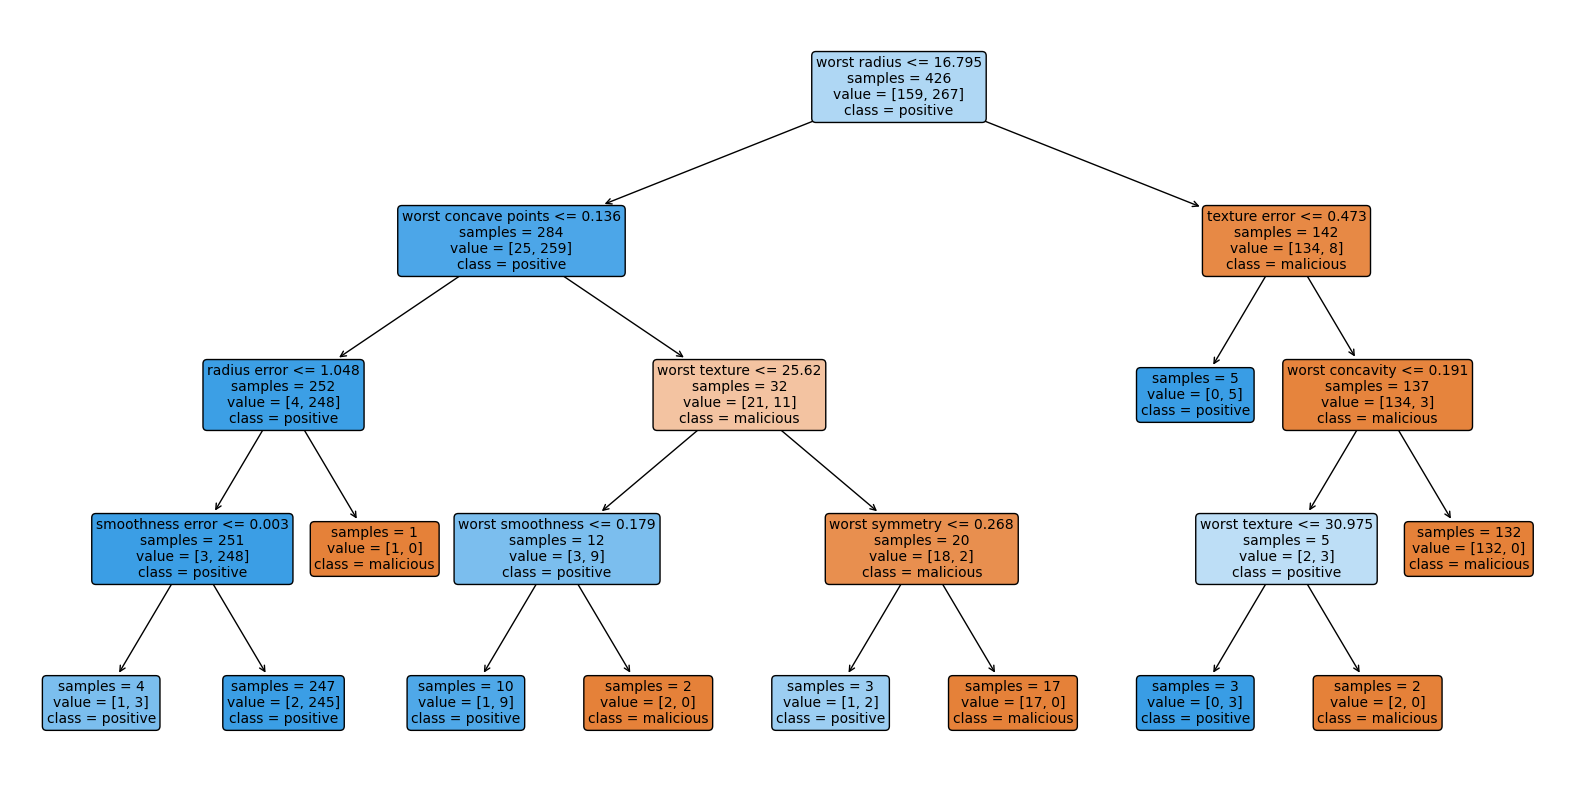

In [27]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree, class_names=["malicious", "positive"],
                feature_names=cancer.feature_names, impurity=False, filled=True, rounded=True, fontsize=10)
plt.show()

In [28]:
print("feature importance:\n", tree.feature_importances_)

feature importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


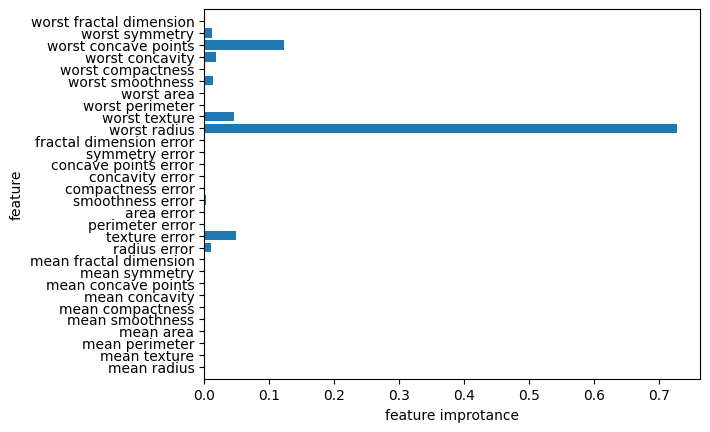

In [29]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("feature improtance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


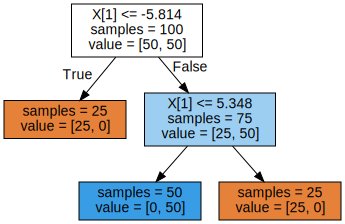

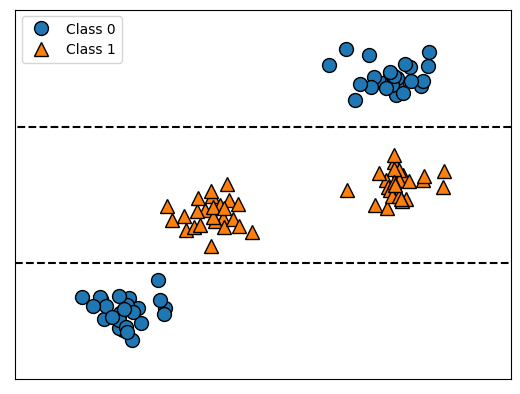

In [30]:
mglearn.plots.plot_tree_not_monotone()

Text(0, 0.5, 'price ($/Mbyte)')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


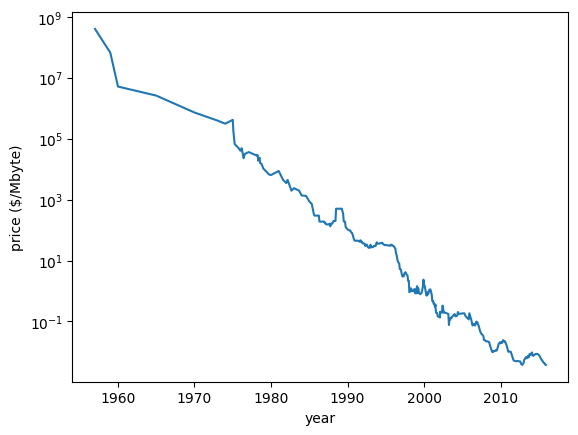

In [31]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("year")
plt.ylabel("price ($/Mbyte)")

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date.to_numpy()[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

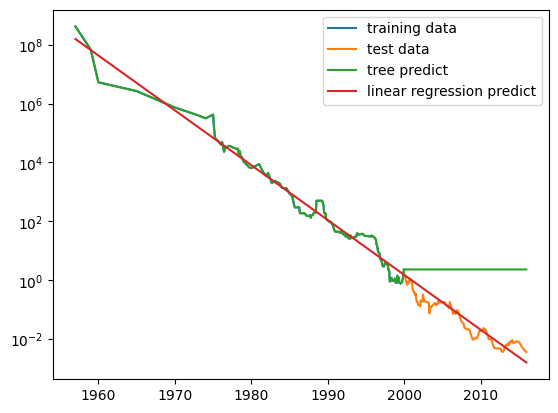

In [33]:
plt.semilogy(data_train.date, data_train.price, label="training data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="tree predict")
plt.semilogy(ram_prices.date, price_lr, label="linear regression predict")
plt.legend()

In [34]:
tree.fit(data_train[['date']], y_train)

print('feature num:', tree.n_features_in_)
print('feature name:', tree.feature_names_in_)

feature num: 1
feature name: ['date']


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

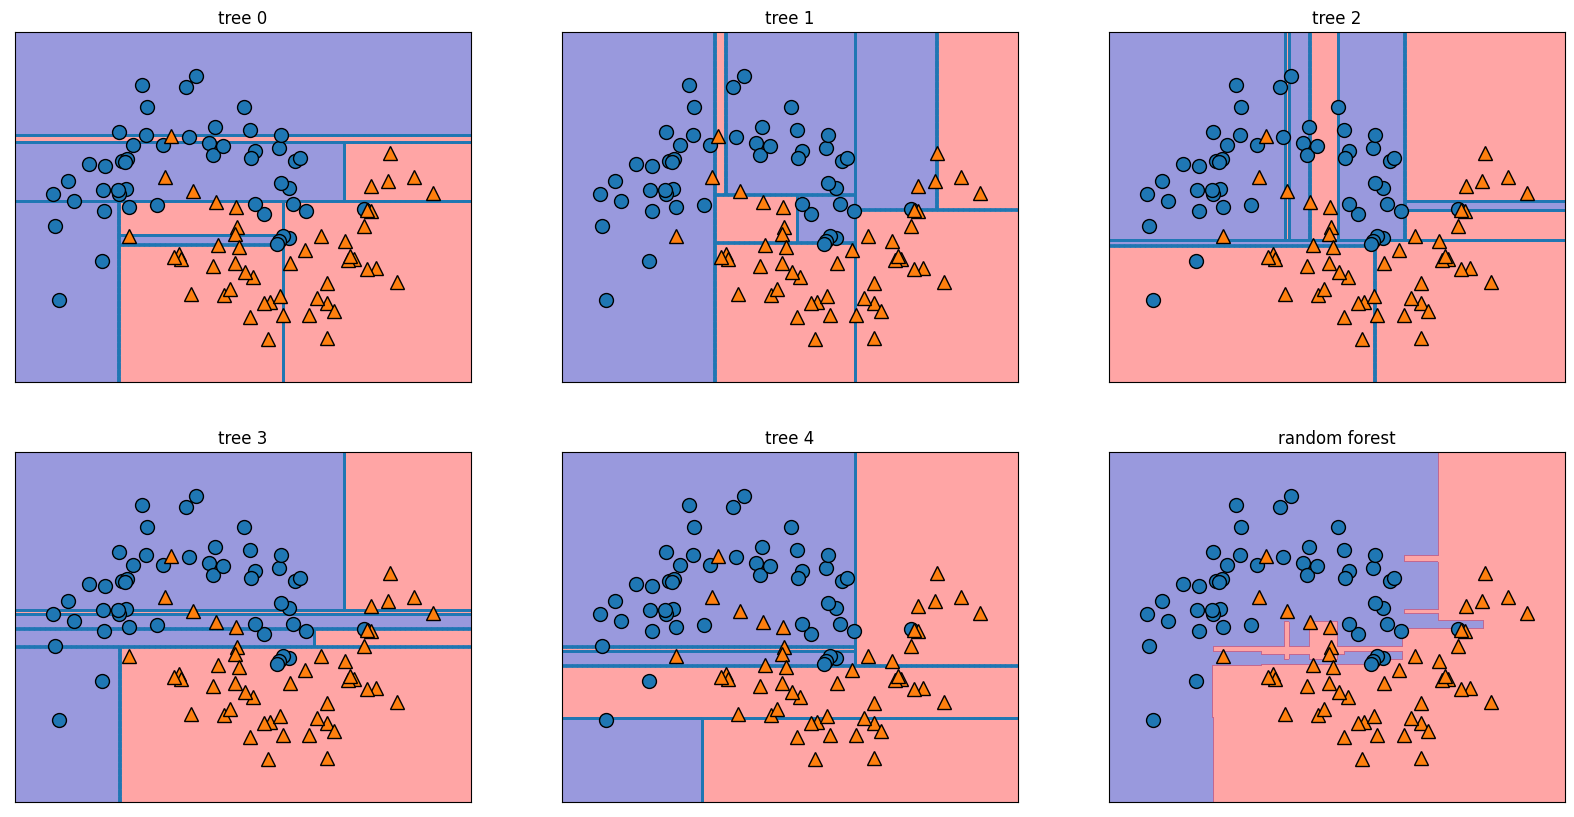

In [36]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("tree {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("random forest")
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
forest.fit(X_train, y_train)

print("training set score: {:.3f}".format(forest.score(X_train, y_train)))
print("test set score: {:.3f}".format(forest.score(X_test, y_test)))

training set score: 0.960
test set score: 0.958


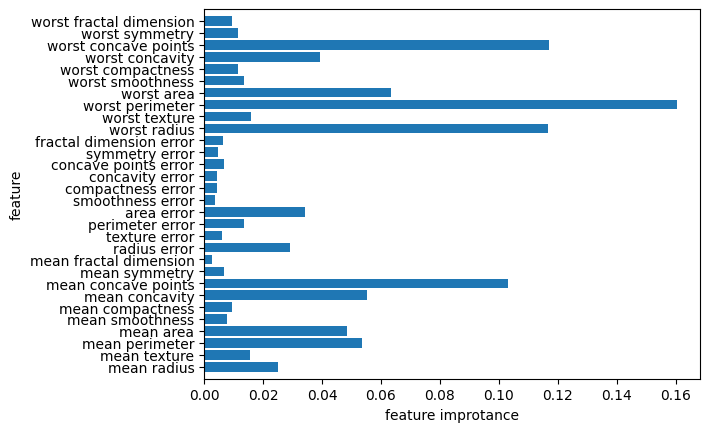

In [38]:
plot_feature_importances_cancer(forest)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("training set score: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.3f}".format(gbrt.score(X_test, y_test)))

training set score: 1.000
test set score: 0.965


In [56]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("training set score: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.3f}".format(gbrt.score(X_test, y_test)))

training set score: 0.991
test set score: 0.972


In [58]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("training set score: {:.3f}".format(gbrt.score(X_train, y_train)))
print("test set score: {:.3f}".format(gbrt.score(X_test, y_test)))

training set score: 0.988
test set score: 0.965


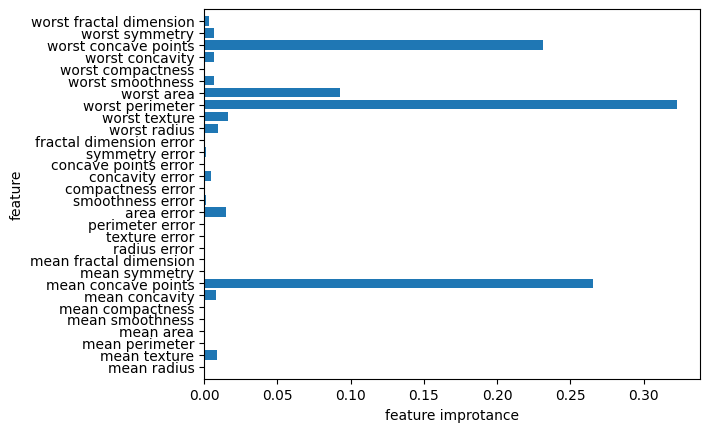

In [42]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)